# Neural Network from library (Pytorch)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('../../data/raw/realistic_linear_regression_dataset.csv')
df.head()

,ProductCategory,Region,CustomerSegment,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,SalesRevenue
0,Furniture,East,High Income,Yes,536.051521,189.277811,1.159611,220.831351,4.035607,146.225757,52,2293.143707
1,Toys,West,High Income,No,352.701361,255.921497,1.545366,467.217175,4.106804,104.261304,35,1640.454368
2,Electronics,South,High Income,No,618.989105,277.399353,1.671902,363.623261,4.021775,77.220752,44,2173.086023
3,Furniture,West,Middle Income,Yes,339.959644,153.557699,1.408244,209.853621,4.148890,128.277455,15,1672.608857
4,Furniture,West,Middle Income,Yes,477.951385,155.814478,2.177301,274.859950,4.913782,111.309643,61,2443.222482


## Data Split

In [2]:
X = df.drop(columns=["SalesRevenue"])
y = df["SalesRevenue"]

numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print(f"(X) Trainning Shape: {X_train.shape}")
print(f"(X) Test Shape: {X_test.shape}")

(X) Trainning Shape: (1600, 11)
(X) Test Shape: (400, 11)


## Preprocessing (Same as EDA notebook)

In [3]:
X_train["IsPromotionApplied"] = X_train["IsPromotionApplied"].map({'Yes': 1, 'No': 0})
X_test["IsPromotionApplied"] = X_test["IsPromotionApplied"].map({'Yes': 1, 'No': 0})

categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Not Bool type (True/False) -> Int (1/0)
dummy_cols_train = X_train.select_dtypes(include=["bool"]).columns
dummy_cols_test = X_test.select_dtypes(include=["bool"]).columns

X_train[dummy_cols_train] = X_train[dummy_cols_train].astype(int)
X_test[dummy_cols_test] = X_test[dummy_cols_test].astype(int)

# Align columns test with train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

X_train.head()

,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Toys,Region_North,Region_South,Region_West,CustomerSegment_Low Income,CustomerSegment_Middle Income
968,1,706.324700,193.672022,0.691915,337.415950,3.469131,83.795709,10,0,0,0,0,0,0,0,0
240,0,419.829496,188.151586,1.374859,345.922550,4.805004,130.724965,82,0,0,0,1,0,0,1,0
819,0,516.855830,233.996923,1.499186,390.185659,3.865647,97.488531,86,1,0,0,0,1,0,0,0
692,1,244.368213,241.848794,1.081512,161.187309,3.968205,80.903238,83,1,0,0,0,0,1,1,0
420,0,518.793165,281.602125,1.224310,376.199077,3.637271,138.878918,12,0,0,0,1,0,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()

X_train[numeric_cols] = scaler_x.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler_x.transform(X_test[numeric_cols])

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

X_train.head()

,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Toys,Region_North,Region_South,Region_West,CustomerSegment_Low Income,CustomerSegment_Middle Income
968,1,2.083952,-0.150868,-1.549476,0.483381,-1.059334,-0.853222,-1.353726,0,0,0,0,0,0,0,0
240,0,-0.819344,-0.260931,-0.202668,0.587488,1.611386,1.587416,1.156725,0,0,0,1,0,0,1,0
819,0,0.163905,0.653104,0.042513,1.129195,-0.266607,-0.141103,1.296195,1,0,0,0,1,0,0,0
692,1,-2.597441,0.809650,-0.781167,-1.673368,-0.061570,-1.003650,1.191593,1,0,0,0,0,1,1,0
420,0,0.183538,1.602227,-0.499560,0.958022,-0.723184,2.011477,-1.283991,0,0,0,1,0,0,0,0


## Neural Network

Epoch 0/100, Loss: 0.8401
Epoch 20/100, Loss: 0.0762
Epoch 40/100, Loss: 0.0696
Epoch 60/100, Loss: 0.0645
Epoch 80/100, Loss: 0.0608

=== Neural Network ===
MAE Train: 64.6936
MSE Train: 6772.4872
MAPE Train: 0.0321
R² Train: 0.9433

---
MAE Test: 79.5894
MSE Test: 10458.7729
MAPE Test: 0.0399
R² Test: 0.9129


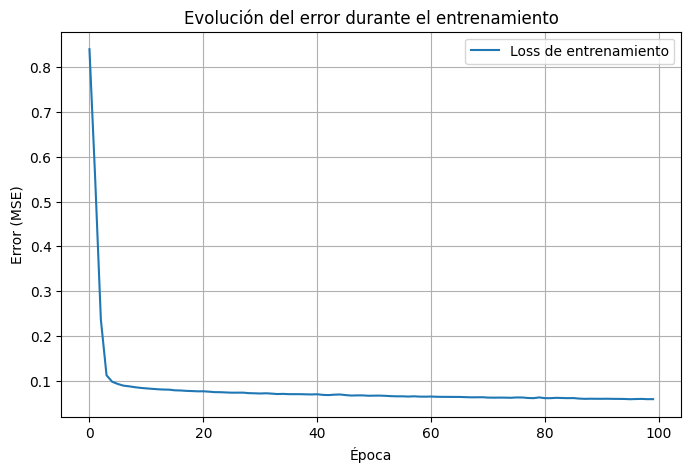

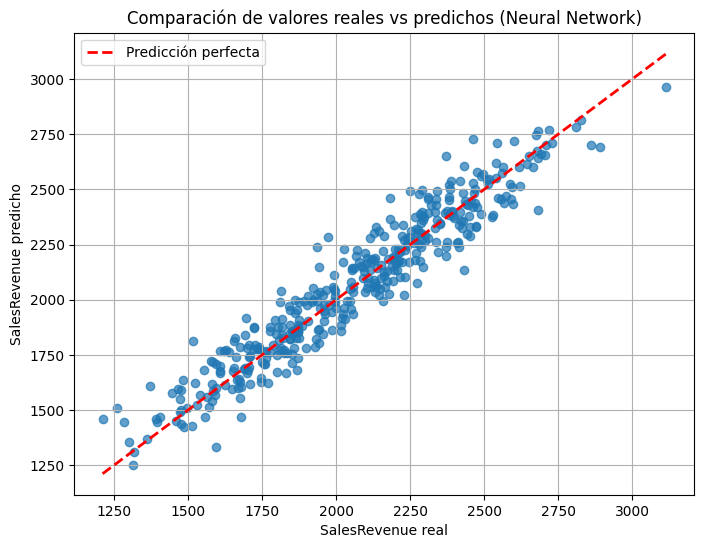

In [8]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

# Float values
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Convert to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32).view(-1, 1)

# Datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Model
class SalesRevenueNN(nn.Module):
    def __init__(self, input_dim):
        super(SalesRevenueNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.net(x)

input_dim = X_train.shape[1]
model = SalesRevenueNN(input_dim)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 100
train_losses = []

# Trainning
for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))
    if epoch % 20 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    y_train_pred_scaled = model(X_train_tensor).numpy()
    y_test_pred_scaled = model(X_test_tensor).numpy()

# Descale predictions
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
y_pred = scaler_y.inverse_transform(y_test_pred_scaled)

# Metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
mape_test = mean_absolute_percentage_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("\n=== Neural Network ===")
print(f"MAE Train: {mae_train:.4f}")
print(f"MSE Train: {mse_train:.4f}")
print(f"MAPE Train: {mape_train:.4f}")
print(f"R² Train: {r2_train:.4f}")

print("\n---")
print(f"MAE Test: {mae_test:.4f}")
print(f"MSE Test: {mse_test:.4f}")
print(f"MAPE Test: {mape_test:.4f}")
print(f"R² Test: {r2_test:.4f}")

# Gráficos
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Loss de entrenamiento")
plt.xlabel("Época")
plt.ylabel("Error (MSE)")
plt.title("Evolución del error durante el entrenamiento")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Predicción perfecta')
plt.xlabel("SalesRevenue real")
plt.ylabel("SalesRevenue predicho")
plt.title("Comparación de valores reales vs predichos (Neural Network)")
plt.legend()
plt.grid(True)
plt.show()
